In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-3-2c44e8e6a4b2>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
<ipython-input-3-2c44e8e6a4b2>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

# Zad
nauczmy model z EarlyStopping

Musimy podać:
* miarę, która ma zostać użyta do zatrzymania modelu
* jak długo ma model ma czekać na otrzymanie lepszego parametru zanim się zatrzyma


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100
845/943 [=========================>....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7411

KeyboardInterrupt: 

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

# Zad.
Na poniższych danych naucz

* model bez EarlyStopping z 1000 epok
* model z wykorzystaniem EarlyStopping 
    dobierz paametr
    ```python
    patience=
    ```

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




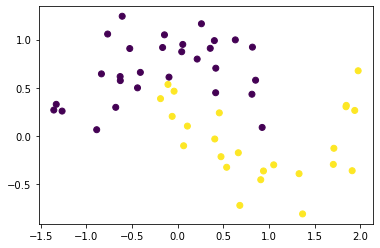

In [16]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [17]:
history = History()
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 834ms/step - loss: 0.6671 - accuracy: 0.5835 - val_loss: 0.6773 - val_accuracy: 0.4681
Epoch 2/100
2/2 [==============================] - 0s 289ms/step - loss: 0.6426 - accuracy: 0.5900 - val_loss: 0.6569 - val_accuracy: 0.7021
Epoch 3/100
2/2 [==============================] - 0s 324ms/step - loss: 0.6272 - accuracy: 0.7783 - val_loss: 0.6395 - val_accuracy: 0.7234
Epoch 4/100
2/2 [==============================] - 0s 286ms/step - loss: 0.5966 - accuracy: 0.8117 - val_loss: 0.6229 - val_accuracy: 0.7872
Epoch 5/100
2/2 [==============================] - 0s 391ms/step - loss: 0.5835 - accuracy: 0.8473 - val_loss: 0.6066 - val_accuracy: 0.7872
Epoch 6/100
2/2 [==============================] - 0s 357ms/step - loss: 0.5636 - accuracy: 0.8473 - val_loss: 0.5908 - val_accuracy: 0.8085
Epoch 7/100
2/2 [==============================] - 0s 367ms/step - loss: 0.5444 - accuracy: 0.8703 - val_loss: 0.5760 - val_accuracy: 0.7872
Epoch 8/100
2

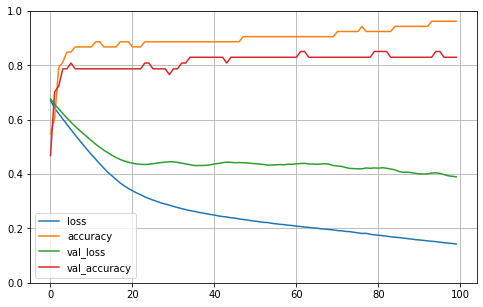

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
history_es = History()
model_es = Sequential()
model_es.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model_es.add(Dense(50,activation="relu"))
model_es.add(Dense(10,activation="relu"))
model_es.add(Dense(1,activation="sigmoid"))
model_es.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_es.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history_es = model_es.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
2/2 [==============================] - 3s 683ms/step - loss: 0.7204 - accuracy: 0.4351 - val_loss: 0.7141 - val_accuracy: 0.4468
Epoch 2/100
2/2 [==============================] - 0s 287ms/step - loss: 0.6959 - accuracy: 0.5419 - val_loss: 0.6956 - val_accuracy: 0.4468
Epoch 3/100
2/2 [==============================] - 0s 239ms/step - loss: 0.6755 - accuracy: 0.5419 - val_loss: 0.6828 - val_accuracy: 0.4468
Epoch 4/100
2/2 [==============================] - 0s 312ms/step - loss: 0.6600 - accuracy: 0.5627 - val_loss: 0.6718 - val_accuracy: 0.4681
Epoch 5/100
2/2 [==============================] - 0s 298ms/step - loss: 0.6491 - accuracy: 0.5002 - val_loss: 0.6644 - val_accuracy: 0.4468
Epoch 6/100
2/2 [==============================] - 0s 218ms/step - loss: 0.6340 - accuracy: 0.5753 - val_loss: 0.6583 - val_accuracy: 0.5106
Epoch 7/100
2/2 [==============================] - 0s 298ms/step - loss: 0.6250 - accuracy: 0.6130 - val_loss: 0.6515 - val_accuracy: 0.6596
Epoch 8/100
2

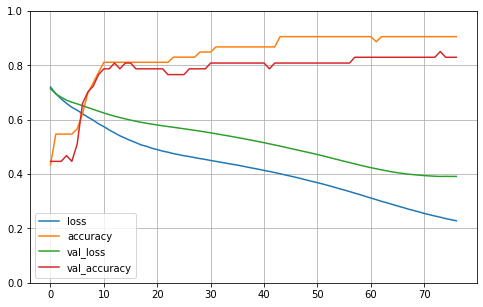

In [22]:
pd.DataFrame(history_es.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

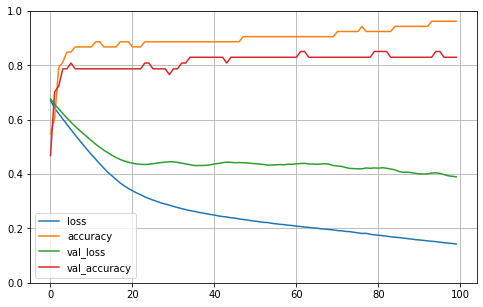

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

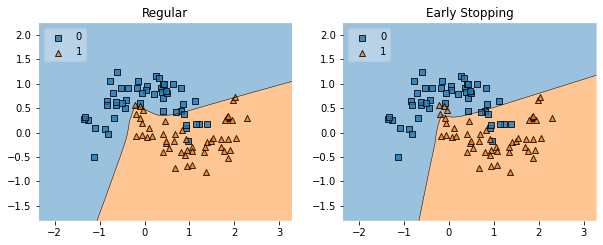

In [23]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Regular', 'Early Stopping']
for clf, lab, grd in zip([model, model_es],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()